# 3. Models Visualization and Inferencing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(sns.__version__)
sns.set_theme(style="darkgrid")

0.11.2


## Model Weights Visualization

In [2]:
# load model weights
df = pd.read_csv("data/models/model_weights.csv")
print(df.shape)
df.head(10)

(9, 20)


,term,estimate,std.error,statistic,p.value,term.1,estimate.1,std.error.1,statistic.1,p.value.1,term.2,estimate.2,std.error.2,statistic.2,p.value.2,term.3,estimate.3,std.error.3,statistic.3,p.value.3
0,(Intercept),-0.679563,1.392355,-0.488067,6.255632e-01,(Intercept),-3.303379,1.517080,-2.177459,2.956765e-02,(Intercept),-3.086869,1.701473,-1.814233,6.979412e-02,(Intercept),-2.458768,1.768873,-1.390019,1.646791e-01
1,PVI_2016,0.003504,0.003678,0.952676,3.408852e-01,PVI_2016,0.006073,0.004119,1.474497,1.405117e-01,PVI_2016,0.005473,0.004480,1.221610,2.220014e-01,PVI_2016,0.008034,0.004822,1.666119,9.584781e-02
2,perc_NHWA,-0.003143,0.015267,-0.205863,8.369214e-01,perc_NHWA,0.024587,0.016580,1.482911,1.382620e-01,perc_NHWA,0.017003,0.018664,0.911006,3.624040e-01,perc_NHWA,0.010636,0.019424,0.547564,5.840531e-01
3,perc_NHNA,0.024947,0.143483,0.173866,8.619906e-01,perc_NHNA,0.273261,0.161144,1.695756,9.009419e-02,perc_NHNA,0.373858,0.178540,2.093968,3.639058e-02,perc_NHNA,0.153797,0.190652,0.806688,4.199428e-01
4,perc_NHBA,0.153761,0.015406,9.980458,7.425967e-23,perc_NHBA,0.213713,0.016750,12.759123,7.566125e-36,perc_NHBA,0.236146,0.018844,12.531281,1.026443e-34,perc_NHBA,0.228846,0.019570,11.693690,1.353855e-30
5,perc_HISP,0.009734,0.015974,0.609367,5.423599e-01,perc_HISP,0.029882,0.017403,1.717116,8.611917e-02,perc_HISP,0.026114,0.019730,1.323573,1.857988e-01,perc_HISP,0.002517,0.020543,0.122544,9.024806e-01
6,Edu_perc_NoHS,-0.086768,0.031255,-2.776113,5.559582e-03,Edu_perc_NoHS,-0.090799,0.034756,-2.612455,9.059530e-03,Edu_perc_NoHS,-0.095581,0.037493,-2.549295,1.086941e-02,Edu_perc_NoHS,-0.083521,0.040191,-2.078123,3.782646e-02
7,Econ_perc_poverty,0.267873,0.025843,10.365247,1.778395e-24,Econ_perc_poverty,0.288876,0.029512,9.788355,4.113884e-22,Econ_perc_poverty,0.315022,0.032962,9.557214,3.461135e-21,Econ_perc_poverty,0.331917,0.035402,9.375711,1.809564e-20
8,Unemployment_rate,0.031218,0.056949,0.548174,5.836417e-01,Unemployment_rate,0.025434,0.074126,0.343124,7.315424e-01,Unemployment_rate,0.089724,0.087036,1.030888,3.027202e-01,Unemployment_rate,0.107070,0.104869,1.020984,3.073865e-01


In [3]:
# transpose table 
models = []
years = [2014, 2015, 2016, 2017]

for i, year in enumerate(years):
    model = df.iloc[:, i*5:(i+1)*5]
    model = model.rename(index=str, columns={model.columns[0]:"term",
                                             model.columns[1]:"estimate",
                                             model.columns[2]:"std.error",
                                             model.columns[3]:"statistic",
                                             model.columns[4]:"p.value"})
    model = model.T
    model.columns = model.iloc[0]
    model = model[1:]
    model["year"] = year
    models.append(model)

models = pd.concat(models)
models = models.reset_index()
models

term,index,(Intercept),PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year
0,estimate,-0.679563,0.00350388,-0.00314285,0.0249469,0.153761,0.00973396,-0.0867682,0.267873,0.031218,2014
1,std.error,1.39235,0.00367793,0.0152667,0.143483,0.0154062,0.0159739,0.0312553,0.0258433,0.056949,2014
2,statistic,-0.488067,0.952676,-0.205863,0.173866,9.98046,0.609367,-2.77611,10.3652,0.548174,2014
3,p.value,0.625563,0.340885,0.836921,0.861991,7.42597e-23,0.54236,0.00555958,1.7784e-24,0.583642,2014
4,estimate,-3.30338,0.00607304,0.0245874,0.273261,0.213713,0.0298822,-0.0907991,0.288876,0.0254343,2015
5,std.error,1.51708,0.00411872,0.0165805,0.161144,0.0167498,0.0174026,0.0347562,0.0295123,0.0741257,2015
6,statistic,-2.17746,1.4745,1.48291,1.69576,12.7591,1.71712,-2.61245,9.78835,0.343124,2015
7,p.value,0.0295677,0.140512,0.138262,0.0900942,7.56612e-36,0.0861192,0.00905953,4.11388e-22,0.731542,2015
8,estimate,-3.08687,0.00547333,0.0170026,0.373858,0.236146,0.026114,-0.0955807,0.315022,0.0897241,2016
9,std.error,1.70147,0.00448042,0.0186636,0.17854,0.0188445,0.0197299,0.037493,0.0329617,0.0870357,2016


In [14]:
# get subsets of coefficients
cols = ["index",
        "year",
        "PVI_2016"]
print(models[cols].to_markdown())

|    | index     |   year |   PVI_2016 |
|---:|:----------|-------:|-----------:|
|  0 | estimate  |   2014 | 0.00350388 |
|  1 | std.error |   2014 | 0.00367793 |
|  2 | statistic |   2014 | 0.952676   |
|  3 | p.value   |   2014 | 0.340885   |
|  4 | estimate  |   2015 | 0.00607304 |
|  5 | std.error |   2015 | 0.00411872 |
|  6 | statistic |   2015 | 1.4745     |
|  7 | p.value   |   2015 | 0.140512   |
|  8 | estimate  |   2016 | 0.00547333 |
|  9 | std.error |   2016 | 0.00448042 |
| 10 | statistic |   2016 | 1.22161    |
| 11 | p.value   |   2016 | 0.222001   |
| 12 | estimate  |   2017 | 0.00803387 |
| 13 | std.error |   2017 | 0.00482191 |
| 14 | statistic |   2017 | 1.66612    |
| 15 | p.value   |   2017 | 0.0958478  |


In [5]:
models.to_markdown()

'|    | index     |   (Intercept) |   PVI_2016 |   perc_NHWA |   perc_NHNA |    perc_NHBA |   perc_HISP |   Edu_perc_NoHS |   Econ_perc_poverty |   Unemployment_rate |   year |\n|---:|:----------|--------------:|-----------:|------------:|------------:|-------------:|------------:|----------------:|--------------------:|--------------------:|-------:|\n|  0 | estimate  |    -0.679563  | 0.00350388 | -0.00314285 |   0.0249469 |  0.153761    |  0.00973396 |     -0.0867682  |         0.267873    |           0.031218  |   2014 |\n|  1 | std.error |     1.39235   | 0.00367793 |  0.0152667  |   0.143483  |  0.0154062   |  0.0159739  |      0.0312553  |         0.0258433   |           0.056949  |   2014 |\n|  2 | statistic |    -0.488067  | 0.952676   | -0.205863   |   0.173866  |  9.98046     |  0.609367   |     -2.77611    |        10.3652      |           0.548174  |   2014 |\n|  3 | p.value   |     0.625563  | 0.340885   |  0.836921   |   0.861991  |  7.42597e-23 |  0.54236    |      0.00

In [48]:
# get subsets of dataframe
coeffs = models[models["index"] == "estimate"].drop(["index", "(Intercept)"], axis=1)
ses = models[models["index"] == "std.error"].drop(["index", "(Intercept)"], axis=1)
pvals = models[models["index"] == "p.value"].drop(["index", "(Intercept)"], axis=1)

# coeffs = models[models["index"] == "estimate"].drop(["index"], axis=1)
# ses = models[models["index"] == "std.error"].drop(["index"], axis=1)
# pvals = models[models["index"] == "p.value"].drop(["index"], axis=1)

In [49]:
col_names = {"PVI_2016": "PVI_2016_se",
             "perc_NHWA": "perc_NHWA_se",
             "perc_NHNA": "perc_NHNA_se",
             "perc_NHBA": "perc_NHBA_se",
             "perc_HISP": "perc_HISP_se",
             "Edu_perc_NoHS": "Edu_perc_NoHS_se",
             "Econ_perc_poverty": "Econ_perc_poverty_se",
             "Unemployment_rate": "Unemployment_rate_se"
            }
ses = ses.rename(index=str, columns=col_names)
coeffs_full = coeffs.merge(ses, on="year")
coeffs_full

term,PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year,PVI_2016_se,perc_NHWA_se,perc_NHNA_se,perc_NHBA_se,perc_HISP_se,Edu_perc_NoHS_se,Econ_perc_poverty_se,Unemployment_rate_se
0,0.00350388,-0.00314285,0.0249469,0.153761,0.00973396,-0.0867682,0.267873,0.031218,2014,0.00367793,0.0152667,0.143483,0.0154062,0.0159739,0.0312553,0.0258433,0.056949
1,0.00607304,0.0245874,0.273261,0.213713,0.0298822,-0.0907991,0.288876,0.0254343,2015,0.00411872,0.0165805,0.161144,0.0167498,0.0174026,0.0347562,0.0295123,0.0741257
2,0.00547333,0.0170026,0.373858,0.236146,0.026114,-0.0955807,0.315022,0.0897241,2016,0.00448042,0.0186636,0.17854,0.0188445,0.0197299,0.037493,0.0329617,0.0870357
3,0.00803387,0.010636,0.153797,0.228846,0.00251736,-0.0835212,0.331917,0.10707,2017,0.00482191,0.0194242,0.190652,0.01957,0.0205425,0.0401907,0.0354018,0.104869


In [50]:
features = ["PVI_2016", 
            "perc_NHWA",
            "perc_NHNA",
            "perc_NHBA",
            "perc_HISP",
            "Edu_perc_NoHS",
            "Econ_perc_poverty",
            "Unemployment_rate"]

for feature in features:
    coeffs_full[f"{feature}_upper"] = coeffs_full[feature] + 1.96*coeffs_full[f"{feature}_se"]
    coeffs_full[f"{feature}_lower"] = coeffs_full[feature] - 1.96*coeffs_full[f"{feature}_se"]

In [51]:
coeffs_full

term,PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year,PVI_2016_se,...,perc_NHBA_upper,perc_NHBA_lower,perc_HISP_upper,perc_HISP_lower,Edu_perc_NoHS_upper,Edu_perc_NoHS_lower,Econ_perc_poverty_upper,Econ_perc_poverty_lower,Unemployment_rate_upper,Unemployment_rate_lower
0,0.00350388,-0.00314285,0.0249469,0.153761,0.00973396,-0.0867682,0.267873,0.031218,2014,0.00367793,...,0.183957,0.123565,0.0410428,-0.0215749,-0.0255078,-0.148029,0.318525,0.21722,0.142838,-0.080402
1,0.00607304,0.0245874,0.273261,0.213713,0.0298822,-0.0907991,0.288876,0.0254343,2015,0.00411872,...,0.246543,0.180884,0.0639913,-0.00422681,-0.0226769,-0.158921,0.346721,0.231032,0.170721,-0.119852
2,0.00547333,0.0170026,0.373858,0.236146,0.026114,-0.0955807,0.315022,0.0897241,2016,0.00448042,...,0.273081,0.19921,0.0647846,-0.0125566,-0.0220944,-0.169067,0.379627,0.250417,0.260314,-0.080866
3,0.00803387,0.010636,0.153797,0.228846,0.00251736,-0.0835212,0.331917,0.10707,2017,0.00482191,...,0.267203,0.190489,0.0427807,-0.037746,-0.00474744,-0.162295,0.401305,0.26253,0.312613,-0.0984737


In [52]:
coeffs_full.columns

Index(['PVI_2016', 'perc_NHWA', 'perc_NHNA', 'perc_NHBA', 'perc_HISP',
       'Edu_perc_NoHS', 'Econ_perc_poverty', 'Unemployment_rate', 'year',
       'PVI_2016_se', 'perc_NHWA_se', 'perc_NHNA_se', 'perc_NHBA_se',
       'perc_HISP_se', 'Edu_perc_NoHS_se', 'Econ_perc_poverty_se',
       'Unemployment_rate_se', 'PVI_2016_upper', 'PVI_2016_lower',
       'perc_NHWA_upper', 'perc_NHWA_lower', 'perc_NHNA_upper',
       'perc_NHNA_lower', 'perc_NHBA_upper', 'perc_NHBA_lower',
       'perc_HISP_upper', 'perc_HISP_lower', 'Edu_perc_NoHS_upper',
       'Edu_perc_NoHS_lower', 'Econ_perc_poverty_upper',
       'Econ_perc_poverty_lower', 'Unemployment_rate_upper',
       'Unemployment_rate_lower'],
      dtype='object', name='term')

In [58]:
# plotting function
def plot_coefficients(coeffs, features, save_filename):
    # plot formatting
    linetype="-o" 
    # plt.tight_layout()

    # generate plots
    plt.figure(1, figsize=(12, 16))
    plt.subplot(211)
    for feature in features:
        plt.plot(coeffs["year"], coeffs[feature], linetype)
        plt.fill_between(coeffs["year"], 
                         coeffs[f"{feature}_lower"].astype(float), 
                         coeffs[f"{feature}_upper"].astype(float), alpha=0.2)
    plt.xticks(coeffs["year"], rotation=45)
    plt.xlabel("Year")
    plt.ylabel("Coefficient Value")
    plt.title("GLM Regression Coefficients over Time")
    plt.legend(bbox_to_anchor=(1.15, 0.75))

    plt.subplot(212)
    for feature in features:
        plt.plot(pvals["year"], pvals[feature], linetype)
    plt.axhline(y=0.05, color='k', linestyle='--')
#     plt.ylim((-0.05, 0.1))
    plt.xticks(coeffs["year"], rotation=45)
    plt.xlabel("Year")
    plt.ylabel("P-Value")
    plt.title("GLM Regression Coefficient P-Values over Time")
    plt.legend(bbox_to_anchor=(1, 0.75))

    plt.savefig(f'pictures/{save_filename}.png', bbox_inches="tight")

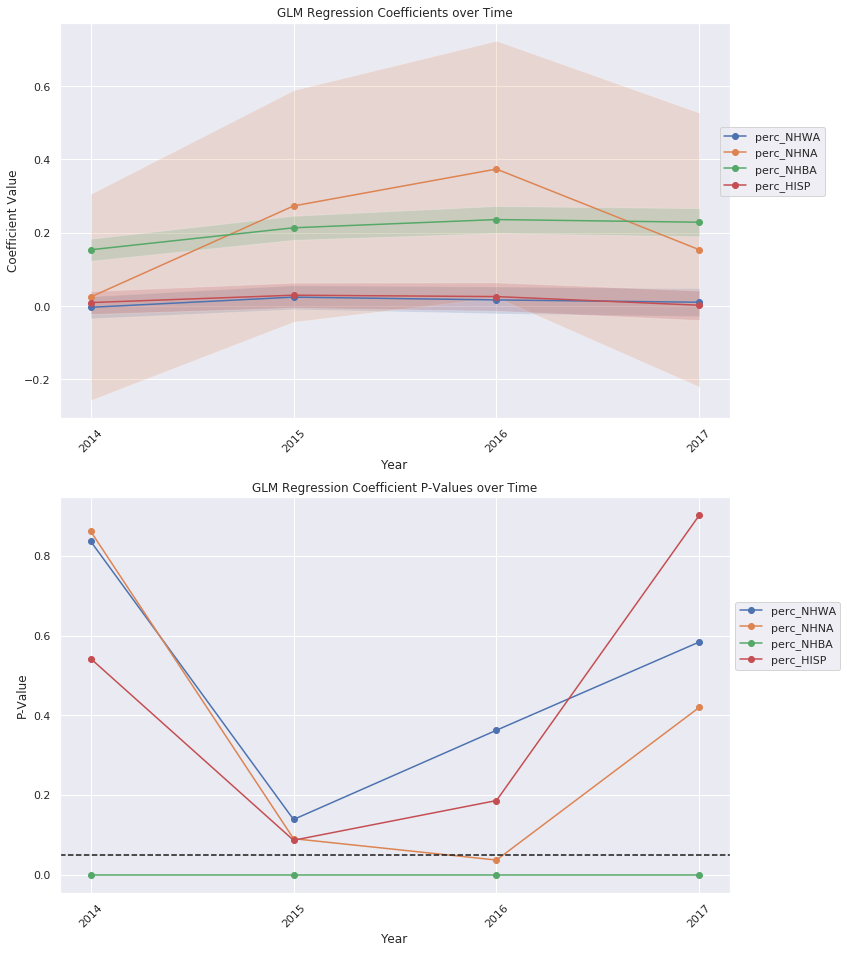

In [59]:
# plot demographic features
features = ["perc_NHWA",
            "perc_NHNA",
            "perc_NHBA",
            "perc_HISP"]
save_filename = "demographic_features"
plot_coefficients(coeffs_full, features, save_filename)

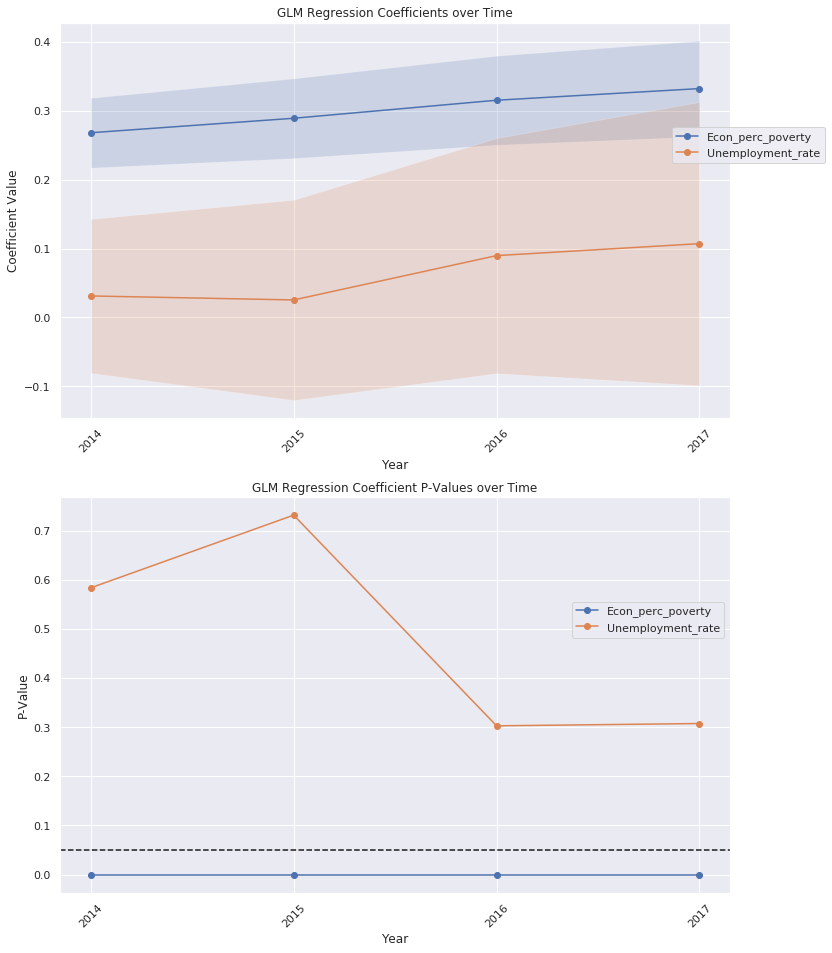

In [60]:
# plot economic features
features = ["Econ_perc_poverty",
            "Unemployment_rate"]
save_filename = "economic_features"
plot_coefficients(coeffs_full, features, save_filename)

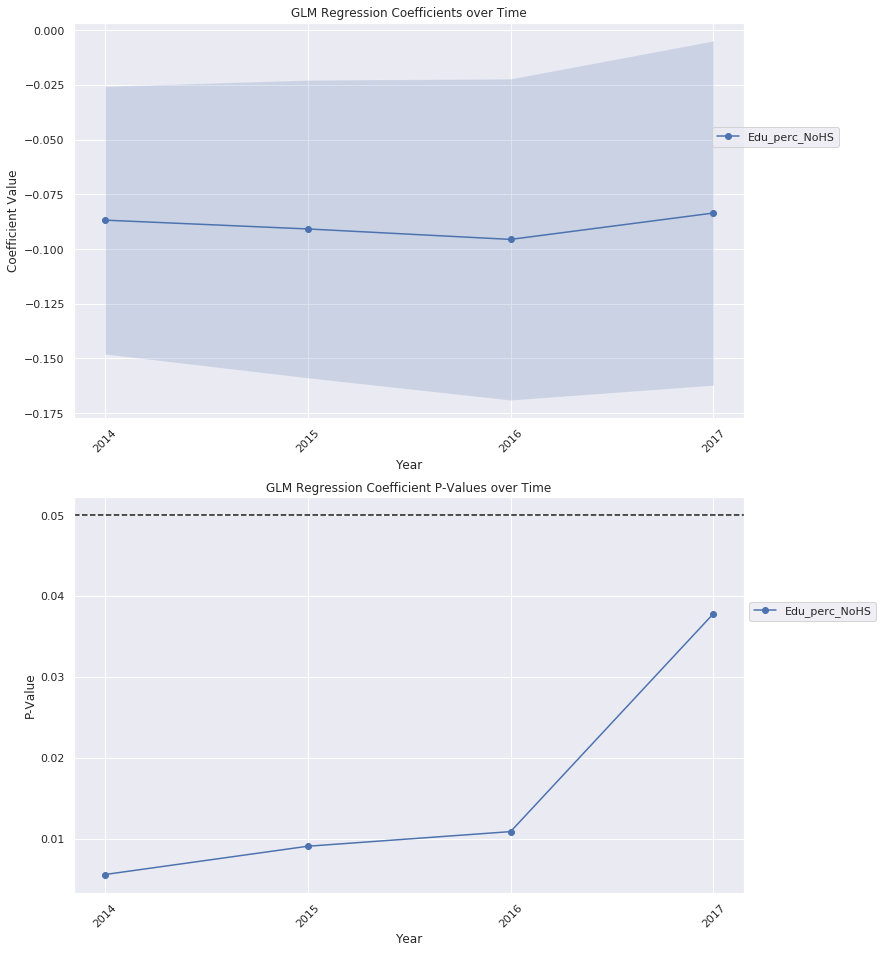

In [61]:
# plot education features
features = ["Edu_perc_NoHS"]
save_filename = "education_features"
plot_coefficients(coeffs_full, features, save_filename)

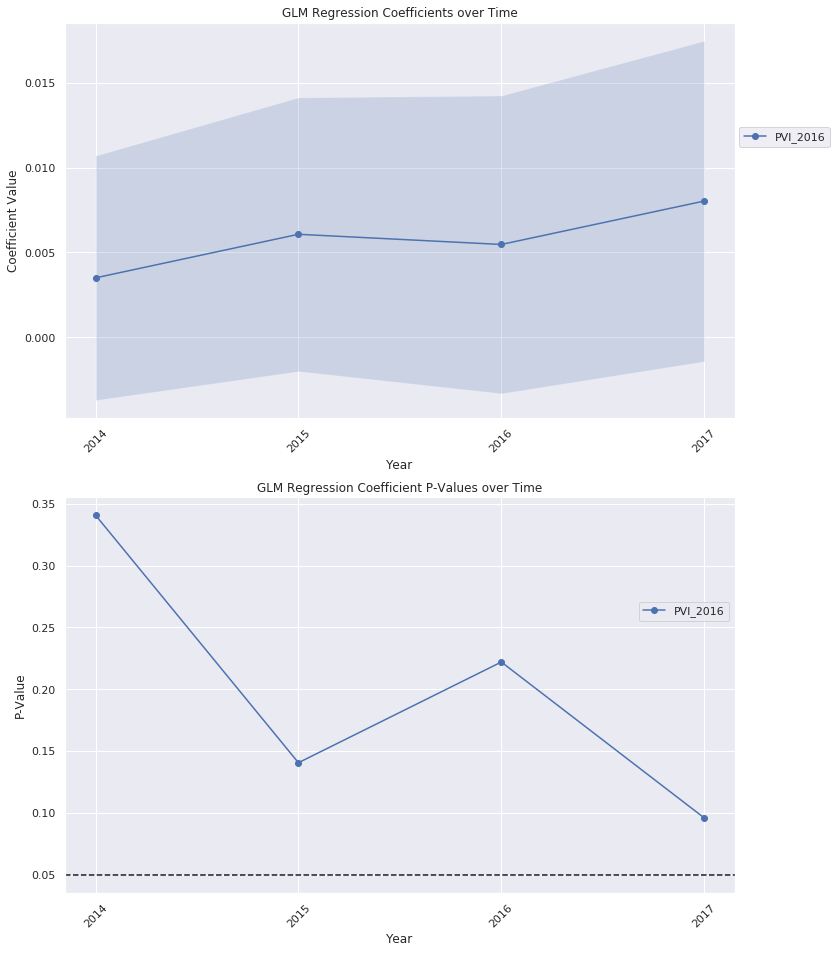

In [62]:
# plot political features
features = ["PVI_2016"]
save_filename = "political_features"
plot_coefficients(coeffs_full, features, save_filename)

## Feature Correlation Matrix

In [32]:
def plot_corr_matrix(year, feature_cols):
    # load data and subset to desired features
    data = pd.read_csv(f"data/complete/GunViolenceByCounty_{year}.csv")
    data_features = data[feature_cols]
    save_filename = f"corr_matrix_{year}"
    # generate correlation matrix
    corrMatrix = data_features.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title(f"Features Correlation Matrix ({year})", fontsize=18)
    # save to png file
    plt.savefig(f'pictures/{save_filename}.png')
    
# features to include in correlation matrix
feature_cols = ["perc_NHWA",
                "perc_NHBA",
                "perc_NHIA",
                "perc_HISP",
                "PVI_2016",
                "Edu_perc_NoHS",
                "Econ_perc_poverty",
                "Unemployment_rate"]

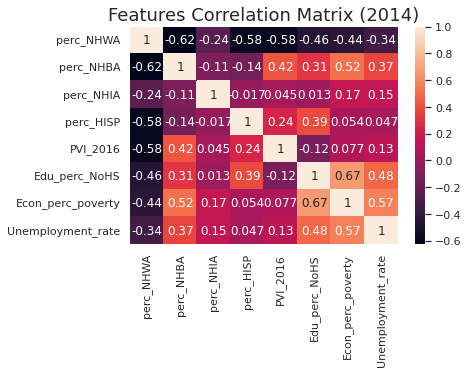

In [33]:
plot_corr_matrix(2014, feature_cols)

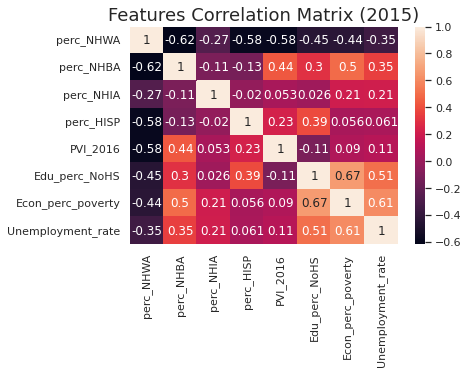

In [34]:
plot_corr_matrix(2015, feature_cols)

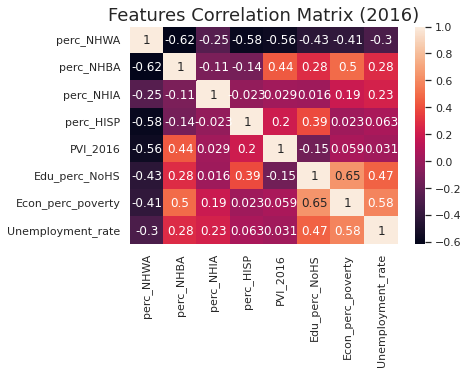

In [35]:
plot_corr_matrix(2016, feature_cols)

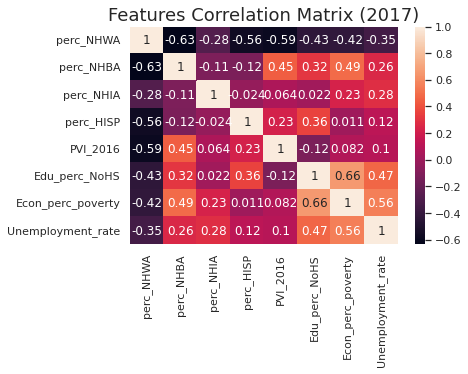

In [36]:
plot_corr_matrix(2017, feature_cols)